In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Crop_recommendation.csv

In [18]:
data = pd.read_csv("Crop_recommendation.csv")

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data.shape

(2200, 8)

In [5]:
X = data.iloc[:,:7]
y = data.iloc[:,7]

In [6]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=1, stratify = y)

In [8]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average="micro")
precision_each_class = precision_score(y_test, y_pred, average=None)

recall = recall_score(y_test, y_pred, average="micro")
recall_each_class = recall_score(y_test, y_pred, average=None)

print("accuracy_score : " + str(accuracy))
print("precision_score : " + str(precision))
print("precision_score for each class: " + str(precision_each_class))
print("recall_score : " + str(recall))
print("recall_score for each class: " + str(recall_each_class))

accuracy_score : 0.9477272727272728
precision_score : 0.9477272727272728
precision_score for each class: [1.         1.         0.71428571 1.         1.         1.
 0.95238095 1.         1.         1.         0.86956522 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.66666667 0.95238095]
recall_score : 0.9477272727272728
recall_score for each class: [1.   1.   1.   1.   1.   1.   1.   1.   0.5  1.   1.   0.95 1.   0.45
 1.   1.   1.   0.95 1.   1.   1.   1.  ]


In [11]:
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class = "ovo")

In [12]:
roc_auc

0.9987878787878788

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

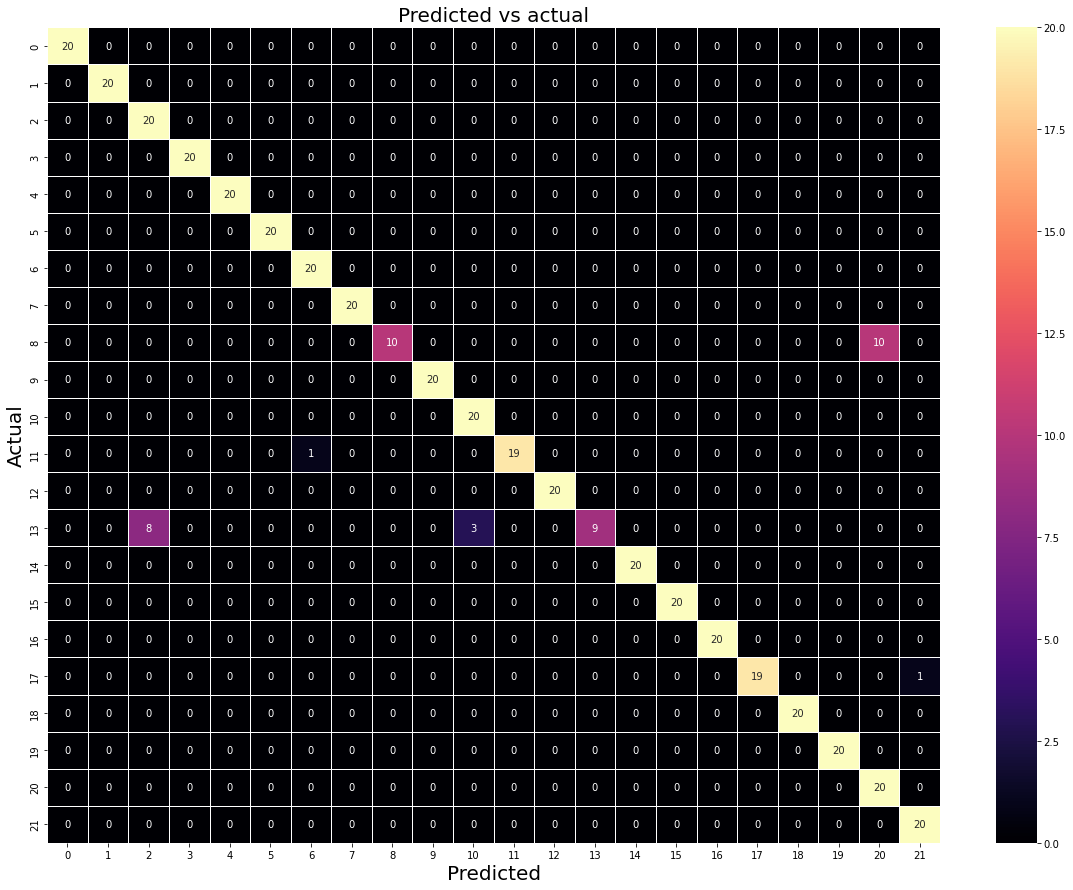

In [14]:
# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cm_test, annot=True, linewidth=0.5, fmt=".0f",cmap='magma', ax = ax)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Predicted vs actual', fontsize=20)
plt.show()

In [15]:
# Classification report for test data
cr_test = classification_report(y_test, y_pred)
print("Classification Report:\n", cr_test)

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.71      1.00      0.83        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.50      0.67        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.87      1.00      0.93        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.45      0.62        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
   

## Generate pickle file

In [16]:
import pickle

# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_random_forest_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)
    
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    pickled_random_forest_model = pickle.load(file)

pickled_random_forest_model

RandomForestClassifier(max_depth=4, random_state=0)

In [17]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = pickled_random_forest_model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
y_prd = pickled_random_forest_model.predict(X_test)  

y_prd

Test score: 94.77 %


array(['rice', 'pomegranate', 'cotton', 'pomegranate', 'grapes',
       'kidneybeans', 'muskmelon', 'apple', 'rice', 'coconut', 'coconut',
       'pomegranate', 'muskmelon', 'chickpea', 'mothbeans', 'mungbean',
       'rice', 'mungbean', 'papaya', 'rice', 'blackgram', 'mango',
       'mungbean', 'pomegranate', 'banana', 'coconut', 'blackgram',
       'pigeonpeas', 'grapes', 'papaya', 'jute', 'chickpea', 'pigeonpeas',
       'pigeonpeas', 'pigeonpeas', 'coconut', 'apple', 'grapes',
       'watermelon', 'orange', 'apple', 'papaya', 'pomegranate', 'orange',
       'cotton', 'muskmelon', 'watermelon', 'blackgram', 'mango',
       'kidneybeans', 'cotton', 'grapes', 'coconut', 'chickpea', 'cotton',
       'mango', 'papaya', 'coconut', 'banana', 'maize', 'jute',
       'pomegranate', 'chickpea', 'coconut', 'mothbeans', 'apple',
       'cotton', 'lentil', 'lentil', 'blackgram', 'apple', 'papaya',
       'lentil', 'pigeonpeas', 'mungbean', 'mungbean', 'maize', 'apple',
       'cotton', 'waterme